In [289]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

## task 1a.a

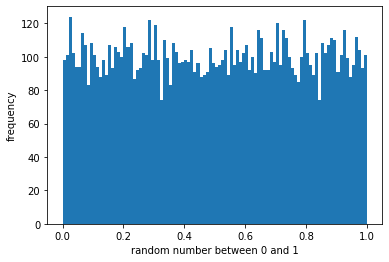

In [290]:
# parameter class: N (no. of random numbers), a (multiplier), c (increment), m (modulus)
class param:
    def __init__(self, N, a, c, m, seed=0):
        self.N = N
        self.a = a
        self.c = c
        self.m = m
        self.seed = seed

# linear congruent generator
def lcg(p):
    if p.seed == 0:
        t = time.gmtime()
        x = t[0] + 70 * (t[1] + 12 * (t[2] + 31 * (t[3] + 23 * t[4] + 59 * t[5])))
    else:
        x = p.seed
        
    r = np.zeros(p.N, dtype=float)
    r[0] = x / p.m
    
    for i in range(1, p.N):
        x = int((p.a * x + p.c)) % p.m
        r[i] = x / p.m
    
    return r

p1 = param(10000, 25214903917, 11, 2**48)
r1 = lcg(p1)

plt.hist(r1, 100)
plt.xlabel('random number between 0 and 1')
plt.ylabel('frequency')
plt.show()

## task 1a.b
- The linear congruent generator does not produce a uniform distribution with given set of parameters, as can be seen from the plot. Also, the periodicity is small.
- The Mersenne Twister generator produces a uniform distribution.

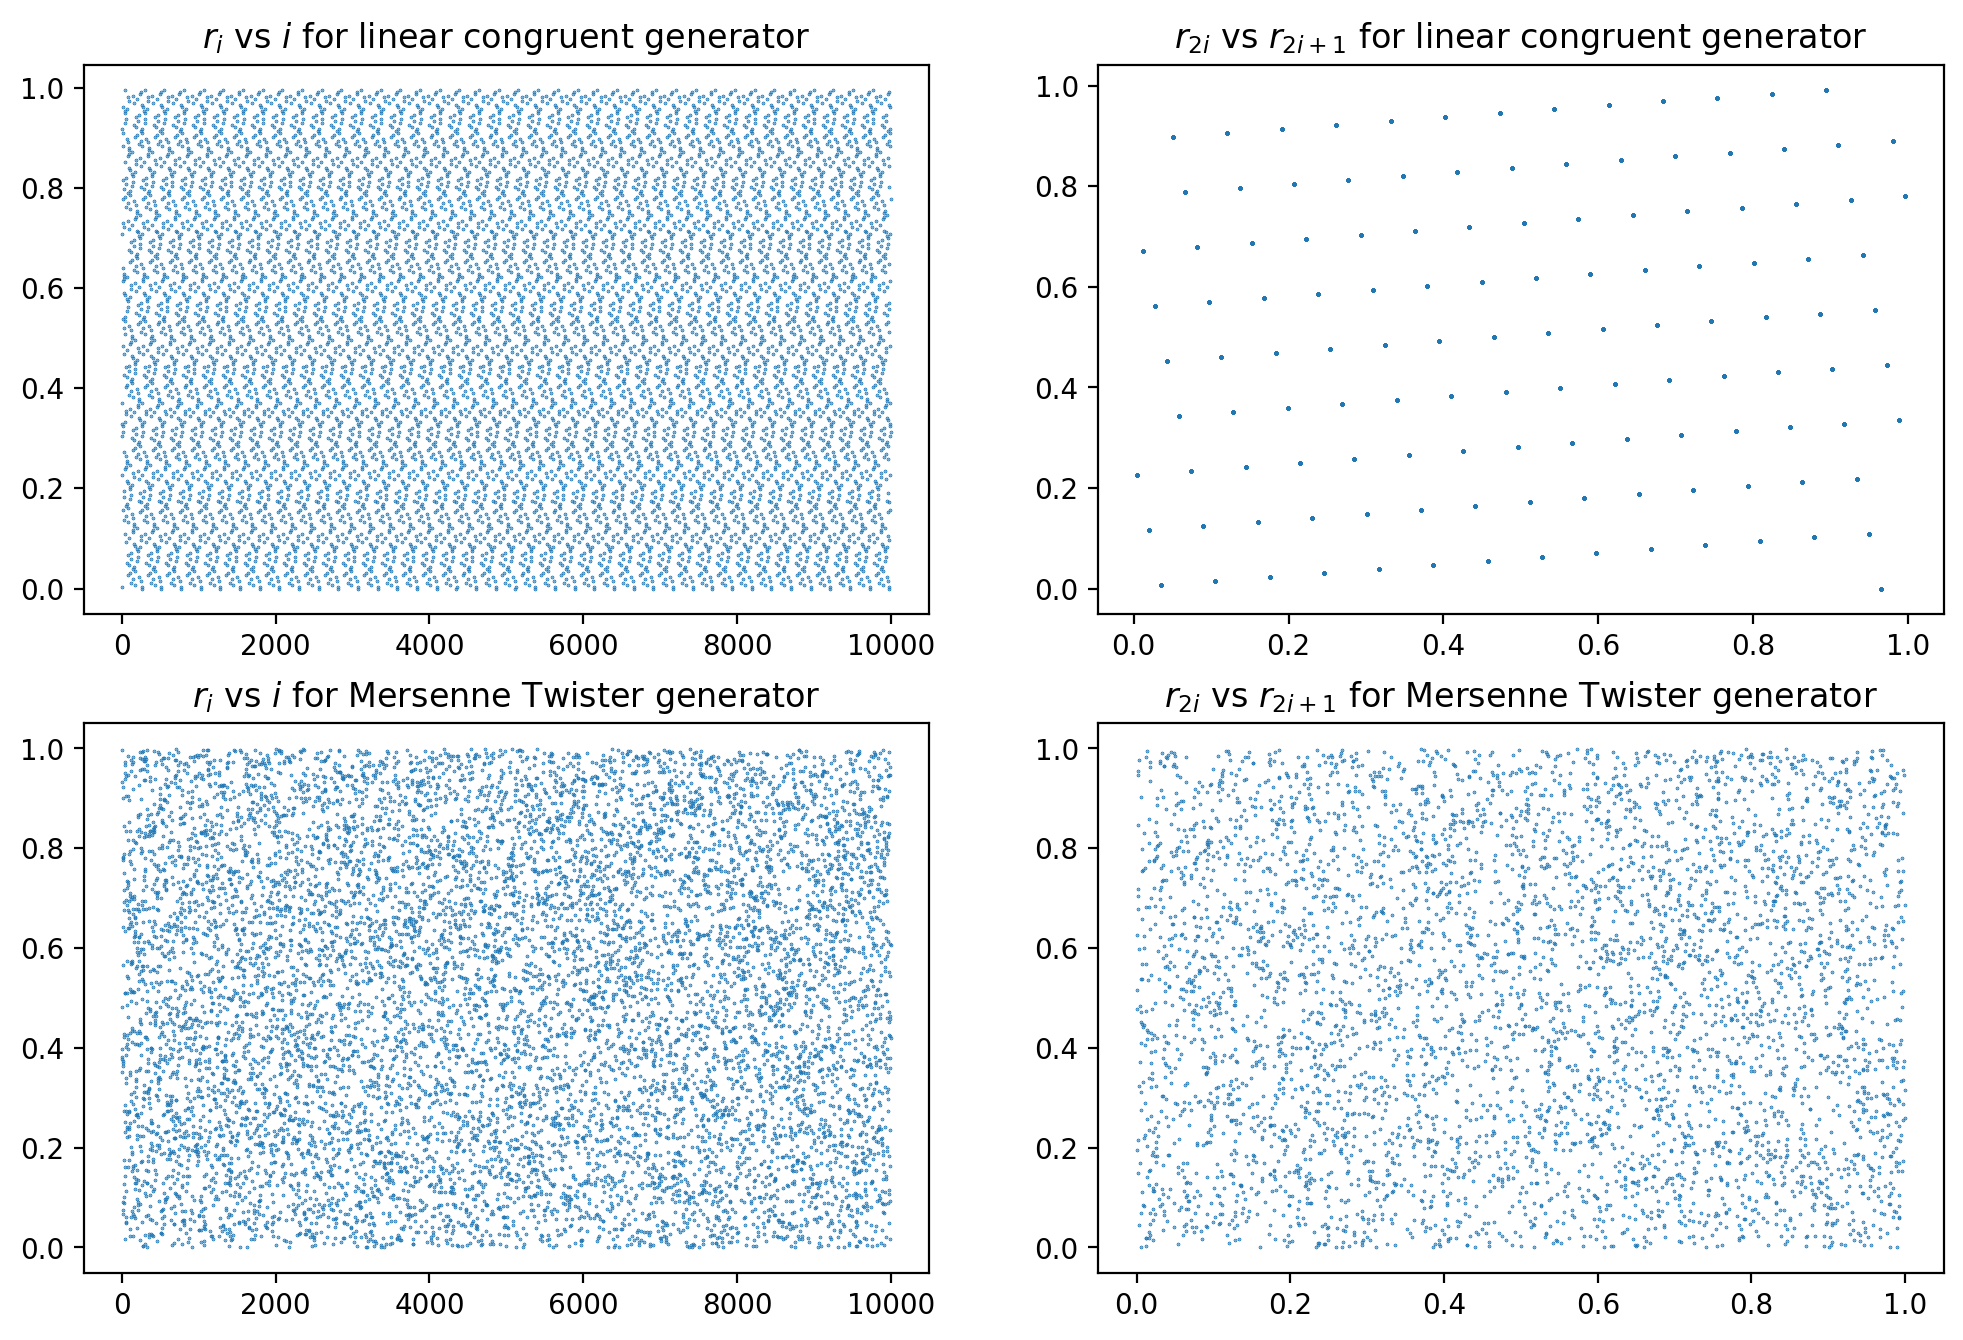

In [291]:
# given parameters
p2 = param(10000, 57, 1, 256, 1)
r2 = lcg(p2)

# Mersenne Twister generator
N3 = 10000
random.seed()
r3 = [random.random() for i in range(N3)]

# plot
fig = plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(221)
plt.scatter(range(p2.N), r2, s=0.1)
plt.title('$r_i$ vs $i$ for linear congruent generator')

plt.subplot(222)
plt.scatter(r2[::2], r2[1::2], s=0.1)
plt.title('$r_{2i}$ vs $r_{2i+1}$ for linear congruent generator')

plt.subplot(223)
plt.scatter(range(N3), r3, s=0.1)
plt.title('$r_i$ vs $i$ for Mersenne Twister generator')

plt.subplot(224)
plt.scatter(r3[::2], r3[1::2], s=0.1)
plt.title('$r_{2i}$ vs $r_{2i+1}$ for Mersenne Twister generator')
plt.show()

## task 1b
- $<x>$ is linear in $N$, as predicted from $<x> = (p-q)lN$, where $l$ is the step length.
- $\Delta x^2$ is quadratic in $N$, as predicted from $\Delta x^2 = 4pql^2N^2$.

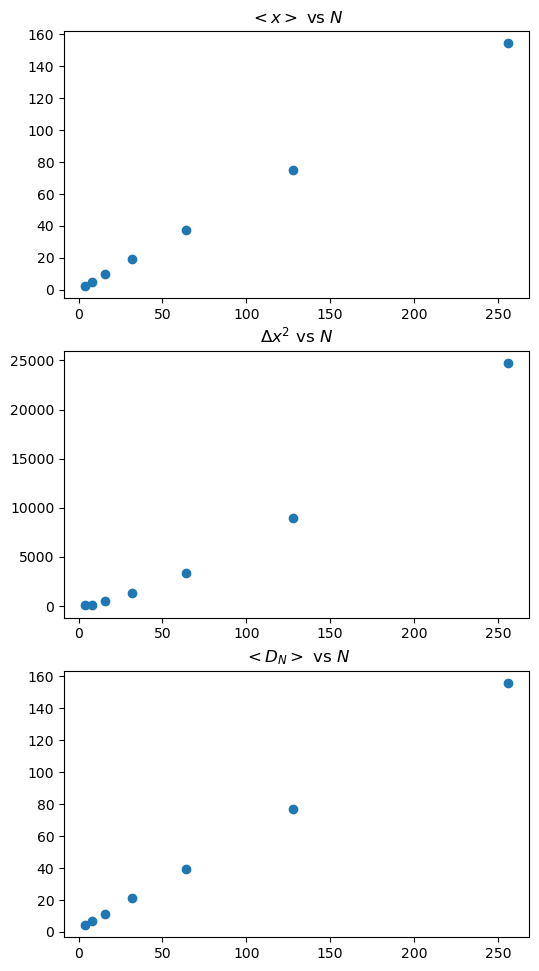

In [294]:
p = 0.8

x_avg = np.zeros(7, dtype=float)
dx_square = np.zeros(7, dtype=int)
D_avg = np.zeros(7, dtype=float)

N_arr = [4, 8, 16, 32, 64, 128, 256]
for n_idx in range(7):
    N = N_arr[n_idx]
    no_of_walks = 10 * int(np.sqrt(N))    # more for higher N
    
    x = np.zeros(no_of_walks, dtype=int)
    D = np.zeros(no_of_walks, dtype=int)
    
    for i in range(no_of_walks):
        random.seed()
        x_temp = x_min = x_max = 0
        
        for j in range(N):
            if random.random() <= p:
                x_temp += 1
            else:
                x_temp -= 1
            
            if x_temp > x_max:
                x_max += 1
            if x_temp < x_min:
                x_min -= 1
        
        x[i] = x_temp
        D[i] = x_max - x_min + 1

    x_avg[n_idx] = np.mean(x)
    dx_square[n_idx] = sum(np.square(x - x_avg[n_idx]))
    D_avg[n_idx] = np.mean(D)
    

fig = plt.figure(figsize=(6, 12), dpi = 100)

plt.subplot(311)
plt.scatter(N_arr, x_avg)
plt.title('$<x>$ vs $N$')

plt.subplot(312)
plt.scatter(N_arr, dx_square)
plt.title('$\Delta x^2$ vs $N$')

plt.subplot(313)
plt.scatter(N_arr, D_avg)
plt.title('$<D_N>$ vs $N$')
plt.show()
    